## 9. 가설검증(An Interactive Guide to Hypothesis Testing in Python)

<div style="text-align: right"> <b>Author : Kwang Myung Yu</b></div>
<div style="text-align: right\"> Initial upload: 2022.4.20 </div>
<div style="text-align: right\"> Last update: 2022.4.20</div>

- 출처 : https://towardsdatascience.com/an-interactive-guide-to-hypothesis-testing-in-python-979f4d62d85

In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [3]:
colors = ["#00798c", "#d1495b", '#edae49', '#66a182', '#4a4a4a',
          '#1a508b', '#e3120b', '#c5a880', '#9F5F80', '#6F9EAF',
          '#0278ae','#F39233', '#A7C5EB', '#54E346', '#ABCE74',
        '#d6b0b1', '#58391c', '#cdd0cb', '#ffb396', '#6930c3']
sns.color_palette(colors[:10])

[(0.0, 0.4745098039215686, 0.5490196078431373),
 (0.8196078431372549, 0.28627450980392155, 0.3568627450980392),
 (0.9294117647058824, 0.6823529411764706, 0.28627450980392155),
 (0.4, 0.6313725490196078, 0.5098039215686274),
 (0.2901960784313726, 0.2901960784313726, 0.2901960784313726),
 (0.10196078431372549, 0.3137254901960784, 0.5450980392156862),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (0.7725490196078432, 0.6588235294117647, 0.5019607843137255),
 (0.6235294117647059, 0.37254901960784315, 0.5019607843137255),
 (0.43529411764705883, 0.6196078431372549, 0.6862745098039216)]

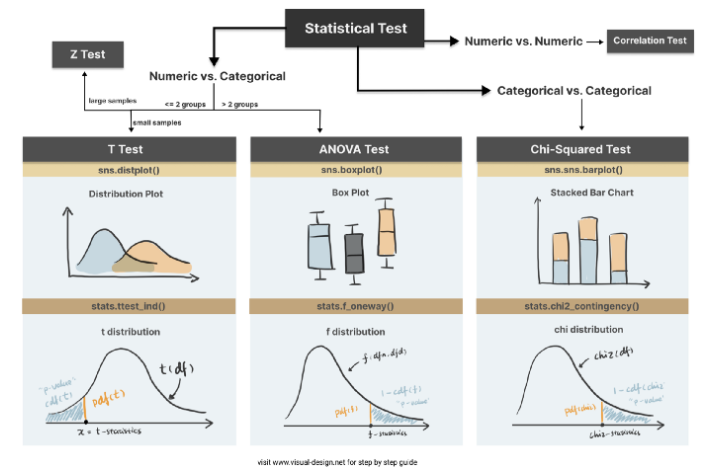

가설검정이란 통계 추론의 중요한 부분중 하나로 샘플의 관측된 데이터로 관측되지 못한 전체 데이터에 대한 결론을 끌어내기 위한 가정

- clinical research: widely used in psychology, biology and healthcare research to examine the effectiveness of clinical trials
- A/B testing: can be applied in business context to improve conversions through testing different versions of campaign incentives, website designs etc
- feature selection in machine learning: filter-based feature selection methods use different statistical tests to determine the feature importance
- college or university: well, if you major in statistics or data science, it is likely to appear in your exams …

### 4 Steps in Hypothesis testing

#### 1. define null and alternative hypothesis

- null hypothesis(H0) : 귀무가설, 처음부터 버릴 것을 예상하는 가설.  
    - 모집단의 모수는 xx와 같다. 모집단의 모수는 xx와 차이가 없다.  
    - 전국 20세 이상의 평균키가 170이라는 주장을 통계적으로 검증하려면, 귀무 가설은 20이상의 성인 남자의 평균키는 170과 같다.(또는 차이가 없다.)
    - 제약회사에서 신약의 효과를 검정하기 위해, 개발한 신약은 효과가 없다.(또는 차이가 없다.)
    - 이처럼 ~와 차이가 없다, 효과는 없다, ~와 같다. 와 같은 형식으로 설정됨
- alternative hypothesis(H1) : 대립가설, 귀무가설이 거짓이라면 대안으로 참이되는 가설
    - 모집단의 모수는 xx와 다른다. 모집단의 모수는 xx와 차이가 있다.  
    - 20세 이상의 성인 남자의 평균키는 170과 다르다.(또는 차이가 있다.)
    - 개발한 신약은 효과가 있다.(또는 차이가 있다.)
    - ~와 차이가 있다, ~의 효과는 있다, ~와 다르다는 형식을 가진다.

통계적 가설을 검정하려면 H0, H1을 설정하고 어떤 가설을 채택할 지 확률적으로 따져보고 둘중 하나를 채택한다.

H0은 기각이 목표이고, 대립가설은 채택이 목표이다.   
표본을 통해 귀무가설을 통계적으로 확인해보고, 귀무가설이 기각되면 자동으로 대립가설이 채택되는 것이다.  
만약 귀무가설이 기각되지 않으면 귀무가설이 맞다는 의미이다.  

그러면 귀무가설이 채택되는지, 기각되는지에 대한 `기준`이 있어야 한다.   
이 기준점을 임계값(critical value)이라고 한다.   

- 임계 값이란 **유의수준에서** 귀무가설의 채택과 기각에 관련된 의사를 결정할 때 그 기준이 되는 값

유의수준(level of significance)은 귀무가설이 실제 옳음에도 기각할 오류...   
다시 말해 귀무가서을 기각할 때 따르는 위험부담...
맞지만 틀릴 수 있는 확률

예를 들어보자.    

어떤 회사의 계약직의 지난해 평규 월급은 150, 표준편차는 12였다.  
올해는 그보다 높을 것이다 생각하여, 임의로 계약직 100명을 뽑아 평균 월급을 조사하였더니 153이었다.  
이 때 올해 계약직 평균 월급이 150 이상이라고 할수 있는지 알아보기 위한 가설을 세워보시오.   


------------------------------------   

모든 계약직(모집단)에 대한 가설 : 월급 150 이상  

표본으로부터 얻은 사실 : 100명의 평균 월급이 153(x=153)
    
따라서 가설을 다음과 같이 설정한다.  
- H0 : 평균=150
- H1 : 평균>150

문제를 다시 보자.

어떤 회사의 계약직의 지난해 평규 월급은 150, 표준편차는 12였다.  
올해는 그보다 높을 것이다 생각하여, 임의로 계약직 100명을 뽑아 평균 월급을 조사하였더니 153이었다.  
이 때 올해 계약직 평균 월급이 150 이상이라고 할수 있는지 유의수준 a = 0.05에서 검정하시오.

문제로 부터 표본평균 153이 평균=150인 모집단에 소속되는지 판단하는 기준이 임계점이다.

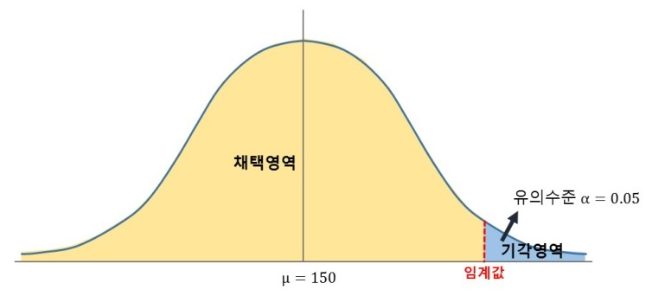

이제 H0이 기각인지 채택인지 판단하기 위한 기준, 입계값을 구해야 한다.  
임계값은 유의수준으로 알수 있다.  

유의수준은 0.05이므로 구하고자 하는 확률 영역은 0.95dlek.   

표준정규분포를 이용해 95%에 해당하는 z를 찾는다.   

z=1.645이다.

따라서  

1.645 = (임계값 - 150) /(12/root(100))   

임계값 = 151.974

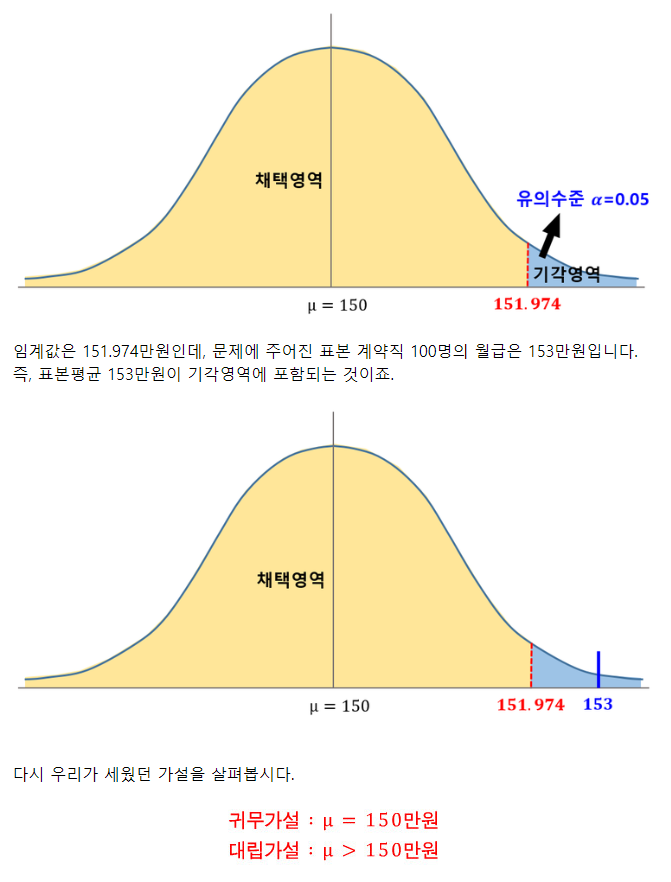

H0이 기각되는 경우는 표본평균 153이 평균 150인 모집단에 포함되지 않을 경우이고,   
채택되는 경우는 표본평균 153이 평균 150인 모집단에 포함되는 경우이다.    

그리고 H0이 채택되는지 판단하는 기준점은 151.974이다.   

즉 표본평균이 151.974보다 클경우 H0이 기각된다.    

표본평균은 153이므로 H0이 기각되고 H1이 채택된다.    


즉, 올해 계약직 평균 월급은 150 이상이다.

--------------

다시 돌아와서...

#### 1. Define null and alternative hypothesis

- Null hypothesis (H0) can be stated differently depends on the statistical tests, but generalize as the claim that no difference, no relationship or no dependency exists between two or more variables.

- Alternative hypothesis (H1) is contradictory to the null hypothesis and it claims that relationships exist. It is the hypothesis that we would like to prove right. However, a more conservational approach is favored in statistics where we always assume null hypothesis is true and try to find evidence to reject the null hypothesis.

#### 2. Choose the appropriate statistical test

- T-test: compare two groups/categories of numeric variables with small sample size
- Z-test: compare two groups/categories of numeric variables with large sample size
- ANOVA test: compare the difference between two or more groups/categories of numeric variables
- Chi-Squared test: examine the relationship between two categorical variables
- Correlation test: examine the relationship between two numeric variables

#### 3. Calculate the p-value

계산된 p 값은 통계 시험에 따라 다르다. 먼저 관측된 샘플 데이터의 평균과 표준 편차에 따라 시험 통계 값을 도출할 수 있다. 그리고 H0의 분포에 따라 확률을 계산할 수 있다.

#### 4. Determine the statistical significance

p 값은 significance level(alpha value)에 대응하여 비교된다. 그래서 H0을 거절할 충분한 증거가 있는지 결정한다.  

일반적으로 significance leval은 0.05로 정한다.   
p가 이보다 크면 H0이 사실일 때 일어날 가능성이 크다는 것이다/???   

반대로 작으면 H0의 분포에서 일어날 가능성이 낮다는 뜻이다.

### Hypothesis Testing with Examples

T-test, ANOVA and Chi-Square test를 시험해 볼 것이다.  

이 시험들은 큰 사이즈의 데이터에 민감하다. 다시말해 큰 데이터에서 p value가 작게 발생된다.     

따라서 원본 데이터에서 100개만 추출하여 진행한다.

In [8]:
df = pd.read_csv('data/marketing_campaign.csv', sep='\t')

In [9]:
df.shape

(2240, 29)

In [10]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [11]:
sampled_df = df.sample(n=100, random_state=100)

In [12]:
sampled_df.shape

(100, 29)

#### T-Test

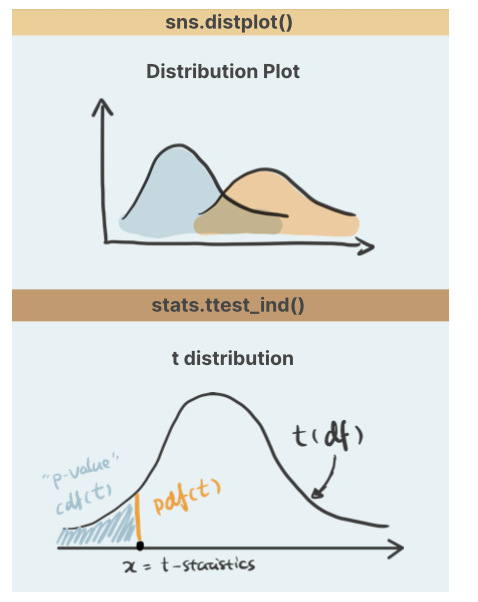

카테고리 수치형 변수와 카테고리 변수의 관계를 시험하고 싶을 때 사용한다.   
t-test에는 세가지 타입이 있다.   


- one sample t-test: test the mean of one group against a constant value
- two sample t-test: test the difference of means between two groups
- paired sample t-test: test the difference of means between two measurements of the same subject

데이터의 Recency(마지막 구매 후 일 수) 컬럼이 타겟인 Response(고객이 마지막 캠페인에서 오퍼에 동의했는지)에 기여하는지 테스트 하고 싶을때   
t-test를 사용할 수 있다.

먼저 캠패인을 승인한 고객의 Recency와 거절한 고객(Response 0)의 Recency를 추출한다.

In [13]:
recency_P = sampled_df[sampled_df['Response']==1]['Recency']
recency_N = sampled_df[sampled_df['Response']==0]['Recency']

In [15]:
print(recency_P)
print(recency_N)

1514    14
1329     3
1280    13
1992    47
1936     3
124     69
399     71
1853     1
1117    24
1641    71
1129    42
962     12
270     31
336     10
1979    56
Name: Recency, dtype: int64
864     61
1085    46
1575    19
1254    51
385     32
        ..
1541    48
610     74
2042    19
843     76
1072    83
Name: Recency, Length: 85, dtype: int64


<AxesSubplot:>

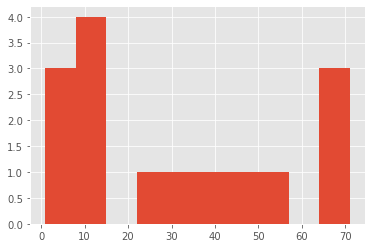

In [17]:
recency_P.hist()

(0.0, 125.0)

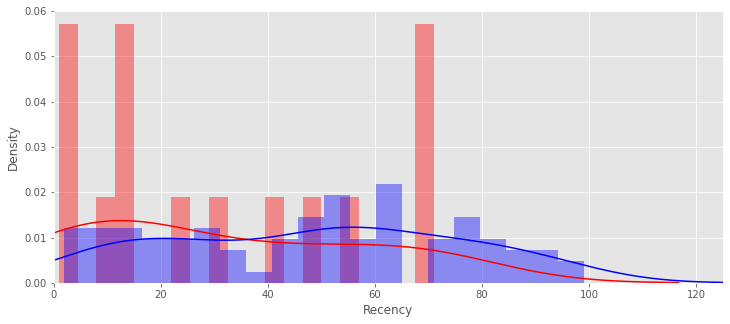

In [21]:
fig, ax = plt.subplots(figsize = (12, 5))
ax = sns.distplot(a=recency_P, bins = 20, color='r')
ax = sns.distplot(a=recency_N, bins = 20, color='b')
ax.set_xlim([0, 125])

- positive response가 낮은 recency를 보이는 것을 알 수 있다.   

이 차이를 계량화 하기 위해서 다음 가설검증을 하고 t-test를 진행한다.

1) H0, H1을 정의한다.    
- H0 : 마지막 캠페인에서 제안을 승인한 고객과 승인하지 않은 고객의 Recency의 차이는 없다.   
- H1 : 제안을 승인한 고객의 Recency가 그렇지 않은 고객보다 짧다.

2) 적합한 테스트를 선정한다.   
- 두 독립샘플의 차이를 시험하기 위해 2sample t-test가 적합하다.  
- 시험 통계가 스튜던트 t분포를 따르면 H0이 true이다.  
- t분포의 모양은 차수에 따라 달라지는데, 두샘플 사이즈-1로 계산된다.

이제 scipy.stats를 불러와서 t분포를 생성해보자.

In [22]:
from scipy.stats import t

In [24]:
rv = t(df=100-2)

In [25]:
rv

3) p value를 계산한다.

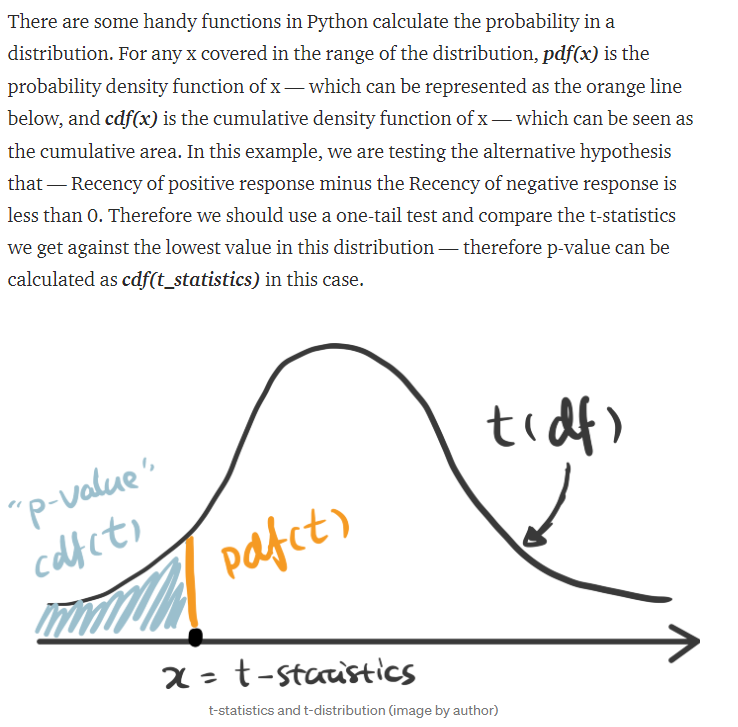

ttest_ind()를 사용하면 t-test를 진행할 수 있다. 두 샘플을 파라미터로 넣고 t-statics와 p-value를 얻는다.

In [26]:
from scipy.stats import ttest_ind

In [27]:
t_stat, pvalue = ttest_ind(recency_P, recency_N)

print('t-statistics: ', t_stat, '\np-value: ', pvalue)

t-statistics:  -2.2792332995612146 
p-value:  0.024822208644980654


4) statistical significance를 결정한다.

일반적으로 사용되는 significanece level은 0.05이다. pvalue는 0.024이므로 이보다 작다. 따라서 제안을 승인한 고객의 recency가 거절한 사람보다 짧을 가능성이 높다. 따라서 ML 모델을 구현할 때 피처로 쓰는 것이 좋다..??

### ANOVA Test

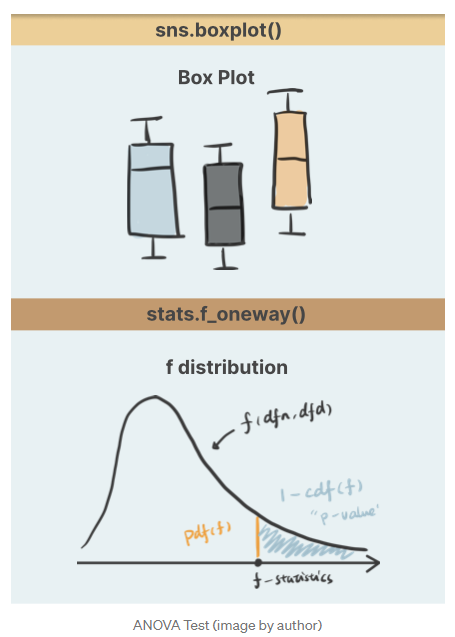

t-test로 하나 또는 두 샘플 그룹의 기대 값을 비교했다. 두 샘플 이상을 비교하려면?? ANOVA test를 사용하자.

ANOVA는 그룹안에서의 variance와 그룹간 variance의 비를 계산에서 그룹간 차이를 평가한다. 큰 값은 그룹간 차이가 크다는 의미이다.

여기서는 NumWebPurchases(웹사이트로 구매한 구매건수)를 예측하기 위한 피처 KidHome(가정의 자녀수)을 사용한다.   
Kidhome은 0,1,2 세 그룹이 있다.

In [39]:
kidhome_0 = sampled_df[sampled_df['Kidhome']==0]['NumWebPurchases']
kidhome_1 = sampled_df[sampled_df['Kidhome']==1]['NumWebPurchases']
kidhome_2 = sampled_df[sampled_df['Kidhome']==2]['NumWebPurchases']

In [49]:
kid_data = sampled_df[(sampled_df['Kidhome']==0)|(sampled_df['Kidhome']==1)|(sampled_df['Kidhome']==2)]

In [52]:
kid_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1514,3865,1977,2n Cycle,Together,20981.0,0,0,30-04-2013,14,2,...,8,0,0,0,0,0,0,3,11,1
864,4120,1975,2n Cycle,Single,49514.0,1,0,17-12-2013,61,88,...,7,0,0,0,0,0,0,3,11,0
1085,6295,1977,Graduation,Married,54233.0,0,1,04-02-2013,46,652,...,8,0,0,0,0,0,0,3,11,0
1575,4967,1960,PhD,Together,38201.0,0,1,29-03-2013,19,233,...,8,0,0,0,0,0,0,3,11,0
1254,5011,1963,Graduation,Divorced,68118.0,0,1,18-10-2013,51,595,...,6,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,7930,1969,Master,Single,26877.0,0,0,19-08-2013,74,101,...,6,0,0,0,0,0,0,3,11,0
2042,8416,1981,Graduation,Married,29009.0,1,0,29-11-2013,19,6,...,6,0,0,0,0,0,0,3,11,0
843,11121,1981,Graduation,Married,19419.0,1,0,10-11-2012,76,2,...,9,0,0,0,0,0,0,3,11,0
1072,3807,1955,Graduation,Together,59925.0,0,1,30-11-2012,83,473,...,6,0,0,0,0,0,0,3,11,0


<AxesSubplot:xlabel='Kidhome', ylabel='NumWebPurchases'>

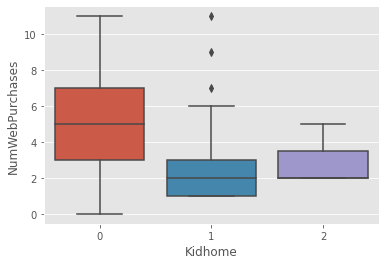

In [53]:
sns.boxplot(x='Kidhome', y='NumWebPurchases', data=kid_data)

- 각 그룹간 차이를 확인할 수 있다.   

이제 ANOVA 테스트를 진행해보자.

1) define hypothesis   
- null: there is no difference among three groups
- alternative: there is difference between at least two groups